In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from summarytools import dfSummary  
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')


In [149]:
data = pd.read_csv('houses_to_rent_v2.csv')

In [150]:
data.shape

(10692, 13)

In [151]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [152]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10692  │ │ int64       │ 9     │                                                          │
│ │ Number of columns │ 13     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                  ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ area                    │   0 │     0 │  149.2 │    537 │   11 │    56 │    90 │   182 │    46340 │   █    │  │
│ │ rooms                   │   0 │     0 │  2.506 │  1.171 │    1 │     2 │     2 │     3 │       13 │  █▇▁   │  │
│ │ bathroom                │   0 │     0 │  2.237 │  1.407 │    1 │     1 │     2 │     3 │       10 │  █▂▂   │  │
│ │ parking spaces          │   0 │     0 │  1.609 │   1.59 │    0 │     0 │     1 │     2 │       12 │  █▄▁   │  │
│ │ hoa (R$)                │   0 │     0 │   1174 │  15590 │    0 │   170 │   560 │  1238 │  1117000 │   █    │  │
│ │ rent amount (R$)        │   0 │     0 │   3896 │   3409 │  450 │  1530 │  2661 │  5000 │    45000 │   █▁   │  │
│ │ property tax (R$)       │   0 │     0 │  366.7 │   3108 │    0 │    38 │   125 │   375 │   313700 │   █    │  │
│ │ fire insurance (R$)     │   0 │     0 │   53.3 │  47.77 │    3 │    21 │    36 │    68 │      677 │   █▁   │  │
│ │ total (R$)              │   0 │     0 │   5490 │  16480 │  499 │  2062 │  3582 │  6768 │  1120000 │   █    │  │
│ └─────────────────────────┴─────┴───────┴────────┴────────┴──────┴───────┴───────┴───────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ city      │  0 │    0 │ Campinas  │ Rio de    │ Belo      │ São Paulo │      10.5 │       2.1 │      22032 │  │
│ │           │    │      │           │ Janeiro   │ Horizonte │           │           │           │            │  │
│ │ floor     │  0 │    0 │ 7         │ 301       │ -         │ 9         │      1.19 │         1 │      10692 │  │
│ │ animal    │  0 │    0 │ acept     │ not acept │ acept     │ not acept │      5.89 │       1.2 │      13068 │  │
│ │ furniture │  0 │    0 │ furnished │ not       │ furnished │ not       │        12 │       1.8 │      18778 │  │
│ │           │    │      │           │ furnished │           │ furnished │           │           │            │  │
│ └───────────┴────┴──────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── 

In [153]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,city[object],1. São Paulo2. Rio de Janeiro3. Belo Horizonte4. Porto Alegre5. Campinas,"5,887 (55.1%)1,501 (14.0%)1,258 (11.8%)1,193 (11.2%)853 (8.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjgsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvwVt1zgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAktJREFUeJzt21GK2lAAheGbEobOS4IILsZFdLFdRHYjYh46w7ykD32pgx1jTE7Eft8KLvKTELmnGoahQMK3tQ/A/0NsxIiNmKqU8lpKeVn7IE/mYxiGt7UP8Wjq7Xb7o2mazdoHeSZ93x+rqvopuHN10zSb/X7/1rbt+9qHeQan0+l713Wbw+HwUkoR21/qUkpp2/Z9t9v9WvswT+R17QM8Ih8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEZMXcqfazFrH+RZ+C3/re77/th13aa4FjObvu+PpZSPtc/xaFwLX4Zr4RdUdqOk+EAgZsnXqFcJZxZbV1kY8dki6yoLIy5Zcl3lrxTO+EAgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmIWWVdZGHHJYusqCyM+cy2cGOsqYnwgEDPna9Rrky/Ntq6ypuKaWdZV1lSMMee6ypqKL/lAIEZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZiZllXWVMxxmzrKmsqrnEtnBjrKmLmerJ5qnHVLIMXYxfGuHvwYuzCWHMNXoxduMqfusSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIuXtdZVnFWLOsqyyrGMMGgRjrKmKmPNk8xZjk5nWVJRVT3bSusqTiHlPWVZZUTOJPXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzE3LSusqTiHjevqyypmMoGgRjrKmJ8IBAjNmJ+A1L8DjfLV/uUAAAAAElFTkSuQmCC"">",0(0.0%)
2,area[int64],Mean (sd) : 149.2 (537.0)min < med < max:11.0 < 90.0 < 46335.0IQR (CV) : 126.0 (0.3),517 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjgsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvwVt1zgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAWlJREFUeJzt109qAjEYh+GkiOhmBhE8jIfoYXsIbyMlLqotSLrrptQ/46L90efZJvnI4mWG1N57gb/u6bcvALeYXdtQa12WUuYT53/03o8Tz8KXi6HWWpfr9fp5GIbVlOGHw+G11voiVh517Ys6H4Zhtd1uj+M4nu4Z3Fpb7Ha71X6/n5dShMpDrv76SyllHMfTZrN5mzB/OeEMfOMxRQShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRJjdsqm1trh3cGttcT6fZ6WUodZ698X4d95776efFj8Be/ct8q45XZ8AAAAASUVORK5CYII="">",0(0.0%)
3,rooms[int64],Mean (sd) : 2.5 (1.2)min < med < max:1.0 < 2.0 < 13.0IQR (CV) : 1.0 (2.1),11 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjgsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvwVt1zgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAjFJREFUeJzt3b2O2kAUhuEzZkFmIbYQEnQ06VNQchG52LTpuYv0CAktRjhLQBOnCVGk/IBnROJv9D71zsBKrxZb7Bm7pmkM6Lrsf78B4B5Pt37AOTc0s0Hg/uemaV4D1wI//DVU59xwOp2+L4piErL54XB4cc59IFbEuvUXdVAUxWS1Wr2WZXlqs3FVVfl6vZ7sdruBmREqotz86DczK8vyNJvNPgfsPwxYA/yCmylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIuGuuP5T3vm9mhXMudAuOBIKZPTDUuq77l8vl3WKx6PV6vVanrFxxJBCuHhbq+Xx+yvP8eblcnubz+Uvb9RwJhJ899KPfzGw0GoUeB2TGkUD4jpspSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSHj4f/jHiBwOZDAwIZ0NNXY4kMHAtHQ21JjhQAYD09PZUK8ihgMZDEwIN1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQ0Pnv+kPx/IC0JBkqzw9IT5Kh8vyA9CQZ6lXM8wO894WFXzpkZvY1ZKFxyfFbd4VaVVXeduPj8ZibmdV1nW+32+d/uT72tTebzZvQSwfvfb+u67fj8fhTlmWXtq+93++PzrmPZhZ0ySLsS9M0f/ydvwF3xNqHt5cQ9QAAAABJRU5ErkJggg=="">",0(0.0%)
4,bathroom[int64],1. 12. 23. 34. 45. 56. 67. 78. 89. 910. 10,"4,301 (40.2%)2,910 (27.2%)1,474 (13.8%)1,111 (10.4%)578 (5.4%)215 (2.0%)85 (0.8%)11 (0.1%)4 (0.0%)3 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjgsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvwVt1zgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA+FJREFUeJzt3U1u21YARtEnQUibiQRDgJfQ7kGLyGK7CC2iezAMa1CnmaiDOEDa5keGxUvLOmeW2QtwQZoEP3txPB4HFJZzH4DrITYyYiMjNjJiIyM2MmIjIzYyYiOzGGO8H2O8m/sgM/h0PB4f5z7ENVltt9sP6/X6Zu6D1A6Hw/1isfhDcJ3Ver2+2e12j5vN5uPch6k8PDz8ut/vb+7u7t6NMcQWWY0xxmaz+Xh7e/vX3IeJvZ/7ANfGAwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZ1RifP7mZ+yCla/v/vharw+Fwv9/vb8aVfXJzOBzuxxif5j7HNfFZOJmF32JE5ZKubK5EF+5iBi8GKpfvIgYvBipvwyUNXq7qafkt8lKXjNjIiI2M2MiIjYzYyIiNjNjIi

<Axes: >

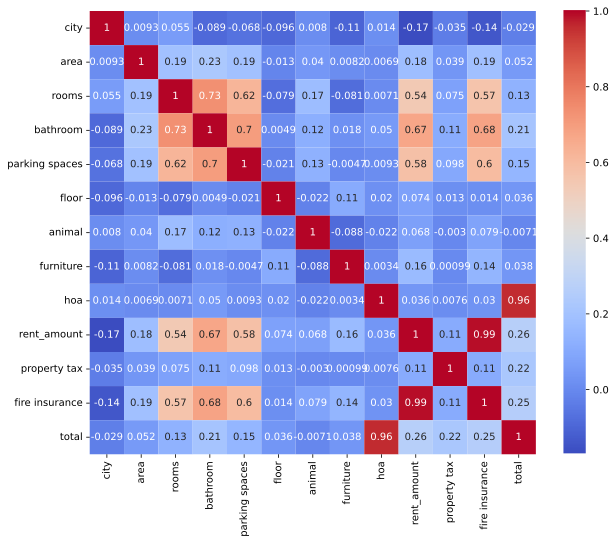

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Figure size 1000x800 with 0 Axes>

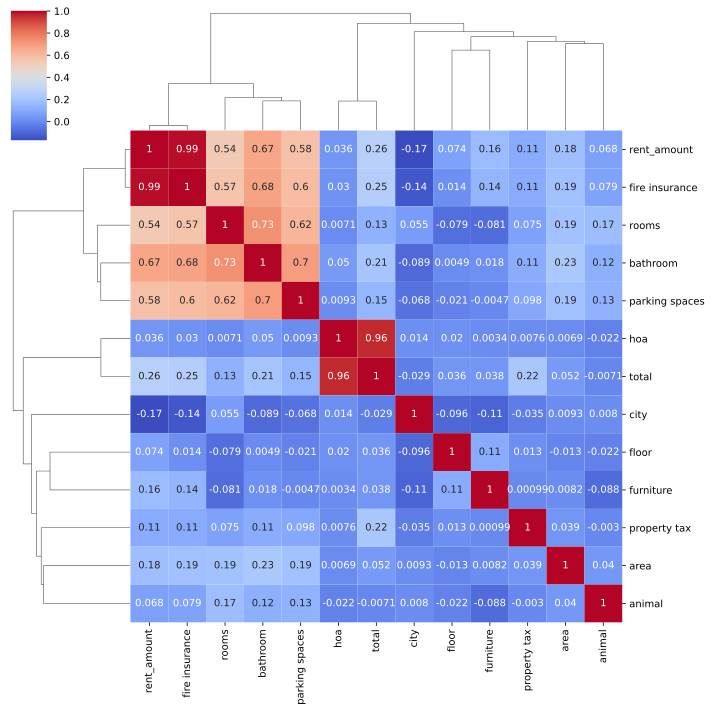

In [191]:
plt.figure(figsize=(10, 8))
sns.clustermap(data.corr(), annot=True, cmap='coolwarm')

In [154]:
data['city'].value_counts()

city
São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: count, dtype: int64

In [155]:
data.rename(columns = {'rent amount (R$)': 'rent_amount'}, inplace = True)
data.rename(columns = {'fire insurance (R$)': 'fire insurance'}, inplace = True)
data.rename(columns = {'property tax (R$)': 'property tax'}, inplace = True)
data.rename(columns = {'hoa (R$)': 'hoa'}, inplace = True)
data.rename(columns = {'total (R$)': 'total'}, inplace = True)

In [156]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent_amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

In [157]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"--- {col} ---")
    print(data[col].value_counts())
    print("\n")

--- city ---
city
São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: count, dtype: int64


--- floor ---
floor
-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
46        1
35        1
301       1
51        1
Name: count, dtype: int64


--- animal ---
animal
acept        8316
not acept    2376
Name: count, dtype: int64


--- furniture ---
furniture
not furnished    8086
furnished        2606
Name: count, dtype: int64




In [158]:
# for floor feature : Replace '-' with 0 in 'floor' column
data['floor'].replace(to_replace='-', value=0, inplace=True)


/tmp/ipykernel_172711/1854604447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['floor'].replace(to_replace='-', value=0, inplace=True)


In [159]:
# For animal feature : Replace 'accepts' with 1 and 'not accepted' with 0 in 'animal' column
data['animal'].replace(to_replace='not acept', value=0, inplace=True)
data['animal'].replace(to_replace='acept', value=1, inplace=True)

/tmp/ipykernel_172711/3598834519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['animal'].replace(to_replace='not acept', value=0, inplace=True)
/tmp/ipykernel_172711/3598834519.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [160]:
# For furniture feature : Replace 'furnished' with 1 and 'not furnished' with 0 in 'furniture' column
data['furniture'].replace(to_replace='furnished', value=1, inplace=True)
data['furniture'].replace(to_replace='not furnished', value=0, inplace=True)

/tmp/ipykernel_172711/1515146844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['furniture'].replace(to_replace='furnished', value=1, inplace=True)
/tmp/ipykernel_172711/1515146844.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [161]:
print(data['animal'].value_counts())

animal
1    8316
0    2376
Name: count, dtype: int64


In [162]:
print(data['floor'].value_counts())

floor
0      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
46        1
35        1
301       1
51        1
Name: count, dtype: int64


In [163]:
print(data['furniture'].value_counts())

furniture
0    8086
1    2606
Name: count, dtype: int64


In [164]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent_amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


In [165]:
data['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [166]:
unique_cities = data['city'].unique()
dict_city = {city: idx for idx, city in enumerate(unique_cities)}

In [167]:
dict_city

{'São Paulo': 0,
 'Porto Alegre': 1,
 'Rio de Janeiro': 2,
 'Campinas': 3,
 'Belo Horizonte': 4}

In [168]:
data['city'] = data['city'].map(dict_city)

In [169]:
data['city'].unique()

array([0, 1, 2, 3, 4])

In [170]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  int64 
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking spaces  10692 non-null  int64 
 5   floor           10692 non-null  object
 6   animal          10692 non-null  int64 
 7   furniture       10692 non-null  int64 
 8   hoa             10692 non-null  int64 
 9   rent_amount     10692 non-null  int64 
 10  property tax    10692 non-null  int64 
 11  fire insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


In [171]:
print(data['floor'].unique())
print(data['floor'].dtype)

['7' '20' '6' '2' '1' 0 '4' '3' '10' '11' '24' '9' '8' '17' '18' '5' '13'
 '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46' '28'
 '29' '301' '51' '32']
object


In [172]:
data['floor'] = data['floor'].astype(int)

In [173]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            10692 non-null  int64
 1   area            10692 non-null  int64
 2   rooms           10692 non-null  int64
 3   bathroom        10692 non-null  int64
 4   parking spaces  10692 non-null  int64
 5   floor           10692 non-null  int64
 6   animal          10692 non-null  int64
 7   furniture       10692 non-null  int64
 8   hoa             10692 non-null  int64
 9   rent_amount     10692 non-null  int64
 10  property tax    10692 non-null  int64
 11  fire insurance  10692 non-null  int64
 12  total           10692 non-null  int64
dtypes: int64(13)
memory usage: 1.1 MB


In [174]:
# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [175]:
# split the dataset into train and test sets (80% train, 20% test)

In [176]:
y=data['total']
X=data.drop(columns=['total'], axis=1)

Pipeline

In [181]:
# feature categorielles nominales
categorical_nominal = ['city']

# feature ordinales/discrètes (naturellement ordinales nous les gardons en integer)
ordinal_features = ['rooms', 'bathroom', 'parking spaces', 'floor']

# feature binaires
binary_features = ['animal', 'furniture']

# feature continues
continuous_features = ['area', 'hoa', 'property tax', 'fire insurance']

# Préprocesseur pour modèles sensibles à l’échelle "Linear Regression" ,"Ridge Regression", "Lasso Regression":
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features + ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_nominal)
    ],
    remainder='passthrough'  # garde les binaires telles quelles
)

# Préprocesseur pour RandomForest (pas de scaling)
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_nominal)
    ],
    remainder='passthrough'
)


In [182]:
# Définition des modèles

models = {
    "Linear Regression": Pipeline([('preprocessor', preprocessor_scaled),
                                   ('model', LinearRegression())]),
    "Ridge Regression": Pipeline([('preprocessor', preprocessor_scaled),
                                  ('model', Ridge(alpha=1.0))]),
    "Lasso Regression": Pipeline([('preprocessor', preprocessor_scaled),
                                  ('model', Lasso(alpha=0.1))]),
    "Support Vector Regression": Pipeline([('preprocessor', preprocessor_scaled),
                                           ('model', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1))]),
    "Random Forest Regressor": Pipeline([('preprocessor', preprocessor_rf),
                                         ('model', RandomForestRegressor(n_estimators=100, random_state=42))])
}


In [183]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    

In [184]:
# Modelisation with different algorithms
results = {}

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }

# Affichage des résultats
for model_name, metrics in results.items():
    print(f"\n{model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.3f}")

    


Linear Regression
MAE: 0.759
MSE: 75.143
RMSE: 8.669
R²: 1.000

Ridge Regression
MAE: 0.838
MSE: 76.041
RMSE: 8.720
R²: 1.000

Lasso Regression
MAE: 7.816
MSE: 251.696
RMSE: 15.865
R²: 1.000

Support Vector Regression
MAE: 1970.455
MSE: 36165973.319
RMSE: 6013.815
R²: 0.214

Random Forest Regressor
MAE: 127.733
MSE: 2614023.979
RMSE: 1616.794
R²: 0.943


Pipline Random forest

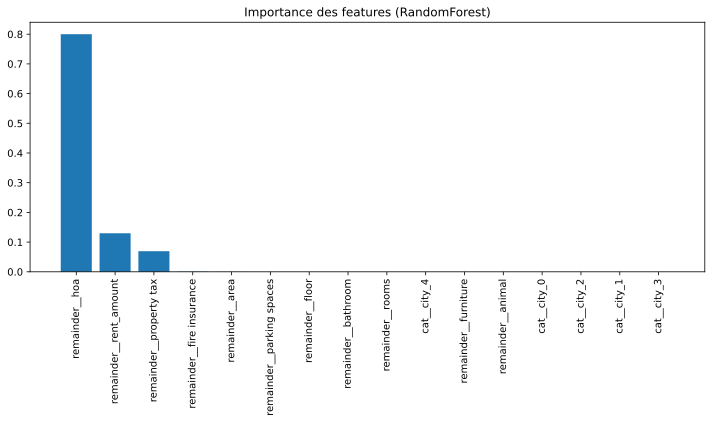

In [192]:
# Récupérer le pipeline RandomForest
rf_pipeline = models["Random Forest Regressor"]
rf_pipeline.fit(X_train, y_train)

# Récupérer le modèle entraîné
rf_model = rf_pipeline.named_steps['model']

# Récupérer les noms des features après transformation
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Importance des features
importances = rf_model.feature_importances_

# Affichage trié
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Importance des features (RandomForest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


### ANN

/home/rochdi/Projets_Github/brazilian_houses_to_rent/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network Evaluation:
MAE: 369.067
MSE: 269584.000
RMSE: 519.215
R²: 0.994


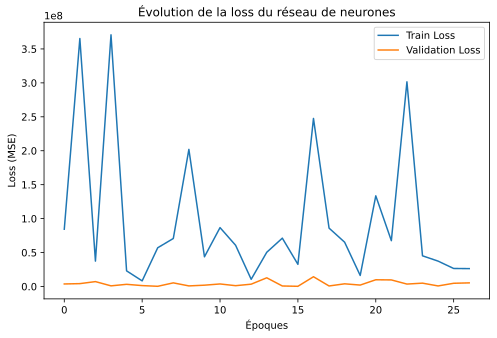

In [198]:
# Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1, activation='linear'))   
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)  
nn_model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model_ANN = nn_model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    verbose=0,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# Prédictions
y_pred_nn = nn_model.predict(X_test)

# Évaluations
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Evaluation:")
print(f"MAE: {mae_nn:.3f}")
print(f"MSE: {mse_nn:.3f}")
print(f"RMSE: {rmse_nn:.3f}")
print(f"R²: {r2_nn:.3f}")

# Graphe de l'évolution de la loss
plt.figure(figsize=(8,5))
plt.plot(model_ANN.history['loss'], label='Train Loss')
plt.plot(model_ANN.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la loss du réseau de neurones')
plt.xlabel('Époques')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()
